In [1]:
import pandas as pd
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


In [2]:
# !pip install torch
# !pip install pyLDAvis
# !pip install ipywidgets
# !pip install transformers
# !pip install lda2vec



In [2]:
# Define the path to the pickle file
pickle_file = 'processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [3]:
# Define the path to the pickle file
pickle_file = 'test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [4]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TITLE_len,ABSTRACT_len,title,abstract
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,4,265,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,4,76,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,8,99,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,9,110,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,20,125,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [5]:
df2 = df[['title', 'abstract']]  # Select the 'TITLE' and 'ABSTRACT' columns
df2.head()

,title,abstract
0,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [6]:
from gensim.corpora import Dictionary


# Convert the text column to a list of lists of tokens
documents = df2['abstract'].tolist()

# Create a dictionary and bag-of-words corpus using Gensim
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


Best Hyperparameters:
{'num_topics': 10, 'alpha': 'symmetric', 'eta': 0.5}
Best Coherence Score: 0.49719302574676155


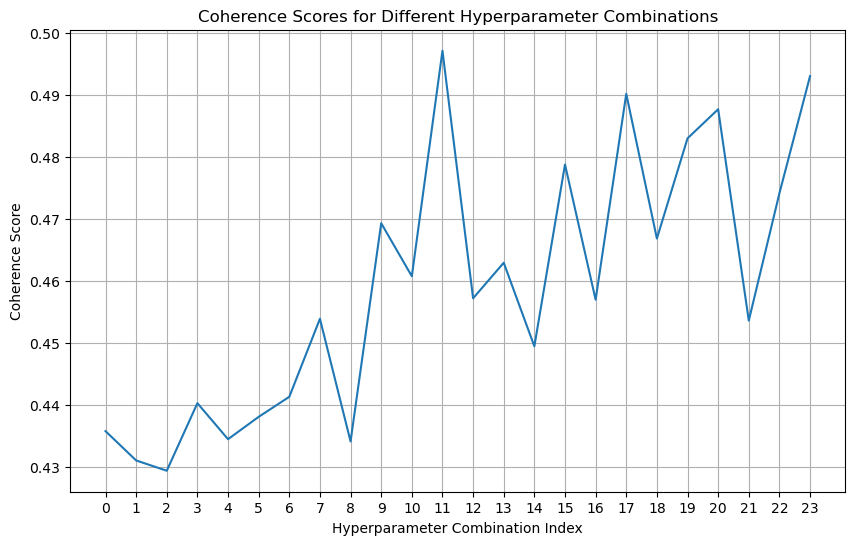

In [14]:
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt

# Define the hyperparameters grid
hyperparameters_grid = {
    'num_topics': [5, 10, 15],  
    'alpha': ['symmetric', 'asymmetric'],  
    'eta': ['auto', 0.01, 0.1, 0.5]  
}

# Initialize variables to store the best model and its coherence score
best_coherence_score = -1
best_lda_model = None
best_hyperparameters = None

# Initialize lists to store coherence scores for plotting
coherence_scores = []
# Hyperparameter tuning
for num_topics in hyperparameters_grid['num_topics']:
    for alpha in hyperparameters_grid['alpha']:
        for eta in hyperparameters_grid['eta']:
            # Train LDA model
            lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, alpha=alpha, eta=eta)
            
            # Compute coherence score
            coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model_lda.get_coherence()
            
            # Track best model
            if coherence_score > best_coherence_score:
                best_coherence_score = coherence_score
                best_lda_model = lda_model
                best_hyperparameters = {'num_topics': num_topics, 'alpha': alpha, 'eta': eta}
            
            # Store coherence score for plotting
            coherence_scores.append((num_topics, alpha, eta, coherence_score))

# Print best hyperparameters and coherence score
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Coherence Score:", best_coherence_score)

# Plot coherence scores
num_topics_values, alpha_values, eta_values, coherence_values = zip(*coherence_scores)
plt.figure(figsize=(10, 6))
plt.plot(coherence_values)
plt.title("Coherence Scores for Different Hyperparameter Combinations")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Coherence Score")
plt.xticks(ticks=range(len(coherence_scores)), labels=range(len(coherence_scores)))
plt.grid(True)
plt.show()


In [9]:
# Use the best LDA model for further analysis
best_lda_model = LdaModel(corpus, num_topics=best_hyperparameters['num_topics'], id2word=dictionary, passes=10, alpha=best_hyperparameters['alpha'], eta=best_hyperparameters['eta'])
# best_lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, alpha='symmetric', eta=0.5)
# Print the topics and their top words
for idx, topic in best_lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')


Topic: 0 
Words: 0.029*"model" + 0.014*"data" + 0.010*"use" + 0.009*"distribution" + 0.008*"sample" + 0.008*"estimate" + 0.007*"test" + 0.006*"process" + 0.006*"study" + 0.006*"propose"

Topic: 1 
Words: 0.003*"sleep" + 0.002*"tile" + 0.002*"die" + 0.002*"pogs" + 0.002*"bead" + 0.001*"der" + 0.001*"de" + 0.001*"cplex" + 0.001*"bob" + 0.001*"rsbt"

Topic: 2 
Words: 0.015*"algorithm" + 0.013*"problem" + 0.011*"propose" + 0.009*"use" + 0.009*"method" + 0.008*"show" + 0.008*"algorithms" + 0.007*"result" + 0.007*"problems" + 0.007*"function"

Topic: 3 
Words: 0.019*"learn" + 0.017*"network" + 0.017*"model" + 0.014*"use" + 0.011*"data" + 0.010*"train" + 0.010*"image" + 0.010*"propose" + 0.009*"neural" + 0.008*"approach"

Topic: 4 
Words: 0.093*"graph" + 0.019*"edge" + 0.019*"nod" + 0.012*"node" + 0.011*"vertices" + 0.010*"tree" + 0.008*"network" + 0.006*"vertex" + 0.004*"walk" + 0.003*"degree"

Topic: 5 
Words: 0.008*"mass" + 0.007*"star" + 0.006*"use" + 0.006*"model" + 0.006*"find" + 0.005*

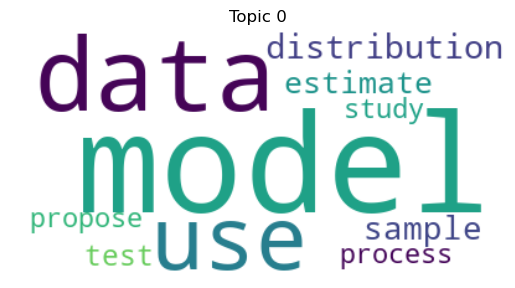

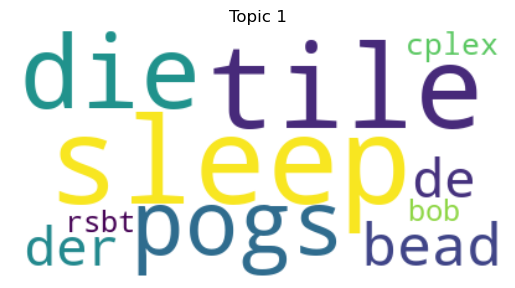

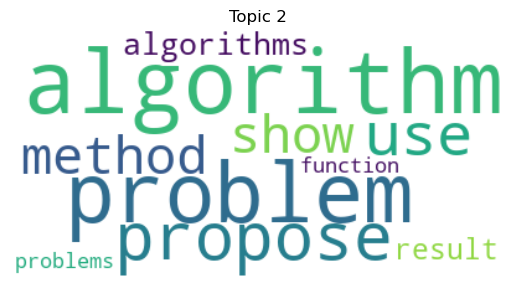

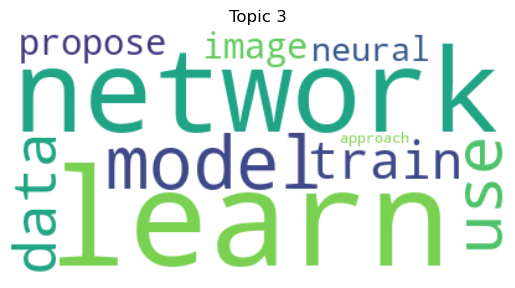

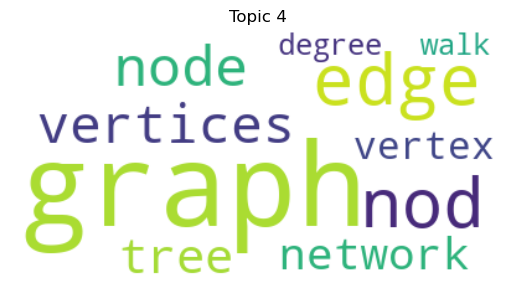

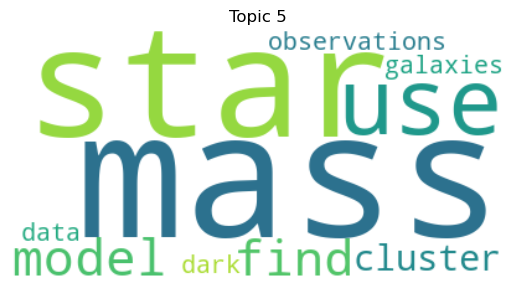

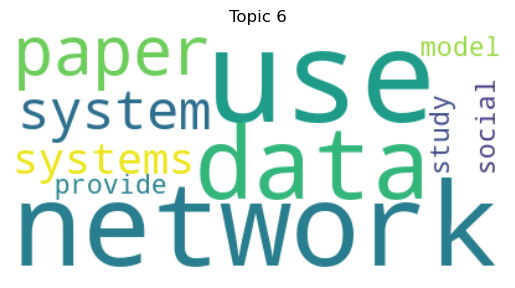

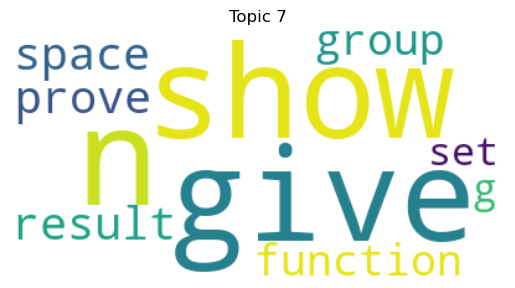

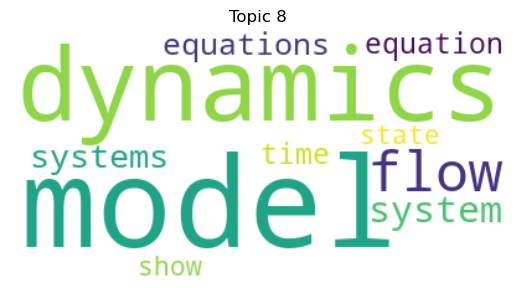

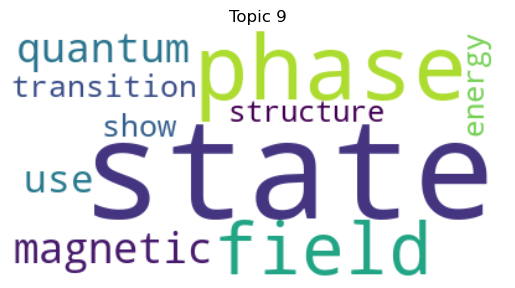

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic
for idx, topic in best_lda_model.show_topics(formatted=False):
    word_freq = {word: freq for word, freq in topic}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx}')
    plt.axis('off')
    plt.show()


In [11]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the best LDA model
lda_display = gensimvis.prepare(best_lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; 

In [12]:
# Initialize an empty dictionary to store topic labels
topic_labels = {}

# Print the topics and their top words
for idx, topic in best_lda_model.print_topics(-1):
    # Extract the top words for each topic
    top_words = [word.split("*")[1].strip().strip('"') for word in topic.split("+")]
    
    # Combine the top words into a single label
    label = ", ".join(top_words)
    topic_labels[idx] = label

# Print the generated topic labels
for topic, label in topic_labels.items():
    print(f"Topic {topic}: {label}")


Topic 0: model, data, use, distribution, sample, estimate, test, process, study, propose
Topic 1: sleep, tile, die, pogs, bead, der, de, cplex, bob, rsbt
Topic 2: algorithm, problem, propose, use, method, show, algorithms, result, problems, function
Topic 3: learn, network, model, use, data, train, image, propose, neural, approach
Topic 4: graph, edge, nod, node, vertices, tree, network, vertex, walk, degree
Topic 5: mass, star, use, model, find, cluster, galaxies, observations, data, dark
Topic 6: use, network, data, paper, system, systems, provide, social, model, study
Topic 7: n, give, show, result, space, prove, group, function, g, set
Topic 8: model, dynamics, flow, system, systems, equations, time, equation, state, show
Topic 9: state, phase, field, magnetic, quantum, use, transition, show, energy, structure


In [33]:
import pickle

# File path where you want to save the model
model_filepath = "best_lda_model.pkl"

# Save the model to a file using pickle
with open(model_filepath, 'wb') as file:
    pickle.dump(best_lda_model, file)

print("LDA model saved successfully.")
# Save the dictionary to a pickle file
with open('dictionary.pkl', 'wb') as f:
    pickle.dump(dictionary, f)

LDA model saved successfully.


In [22]:
# Define labels for each topic based on the predominant themes suggested by the top words
topic_labels = {
    0: "Statistics and Probability",
    1: "Miscellaneous",
    2: "Algorithmic Problem Solving",
    3: "Machine Learning and Neural Networks",
    4: "Graph Theory",
    5: "Astronomy and Astrophysics",
    6: "Social Networks and Systems",
    7: "Mathematics and Proof",
    8: "Dynamics and Systems Theory",
    9: "Physics - Quantum Mechanics"
}

# Print the assigned labels for each topic
for topic, label in topic_labels.items():
    print(f"Topic {topic}: {label}")


Topic 0: Statistics and Probability
Topic 1: Miscellaneous
Topic 2: Algorithmic Problem Solving
Topic 3: Machine Learning and Neural Networks
Topic 4: Graph Theory
Topic 5: Astronomy and Astrophysics
Topic 6: Social Networks and Systems
Topic 7: Mathematics and Proof
Topic 8: Dynamics and Systems Theory
Topic 9: Physics - Quantum Mechanics


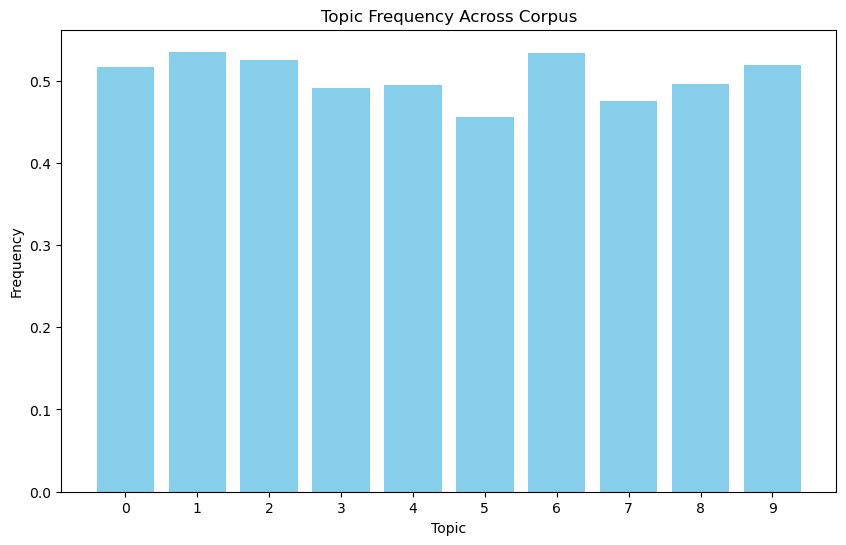

In [36]:
import numpy as np
import matplotlib.pyplot as plt

doc_topic_matrix = np.random.rand(100, 10)

topic_freq = np.mean(doc_topic_matrix, axis=0)

plt.figure(figsize=(10, 6))
plt.bar(range(len(topic_freq)), topic_freq, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Frequency Across Corpus')
plt.xticks(range(len(topic_freq))) 
plt.show()


In [29]:
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
#Reference:https://link.springer.com/article/10.1023/A:1007601113994
new_text = "We consider the problem of learning to perform information extraction in domains where linguistic processing is problematic, such as Usenet posts, email, and finger plan files. In place of syntactic and semantic information, other sources of information can be used, such as term frequency, typography, formatting, and mark-up. We describe four learning approaches to this problem, each drawn from a different paradigm: a rote learner, a term-space learner based on Naive Bayes, an approach using grammatical induction, and a relational rule learner. Experiments on 14 information extraction problems defined over four diverse document collections demonstrate the effectiveness of these approaches. Finally, we describe a multistrategy approach which combines these learners and yields performance competitive with or better than the best of them. This technique is modular and flexible, and could find application in other machine learning problems."
tokens = simple_preprocess(new_text)

bow = dictionary.doc2bow(tokens)

inferred_topics = best_lda_model.get_document_topics(bow)

print("Inferred Topics:")
for topic, prob in inferred_topics:
    print(f"Topic {topic}: {prob:.4f}")



Inferred Topics:
Topic 2: 0.1101
Topic 3: 0.7350
Topic 6: 0.1441


In [30]:
assigned_topics = []
data = df[['TITLE', 'ABSTRACT']]

for abstract in data['ABSTRACT']:
    bow = dictionary.doc2bow(abstract.split())
    topic_distribution = best_lda_model.get_document_topics(bow)
    top_topic = max(topic_distribution, key=lambda item: item[1])[0]
    assigned_topics.append(top_topic)

data['Topic'] = assigned_topics

data.head()

C:\Users\chewr\AppData\Local\Temp\ipykernel_20340\161985928.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic'] = assigned_topics


,TITLE,ABSTRACT,Topic
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,3
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,3
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,7
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,2
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,3


In [38]:
import pandas as pd

assigned_topics = []
topic_probabilities = []

data = df[['TITLE', 'ABSTRACT']].copy()  # Make a copy to avoid SettingWithCopyWarning

for abstract in data['ABSTRACT']:
    bow = dictionary.doc2bow(abstract.split())
    topic_distribution = best_lda_model.get_document_topics(bow)
    top_topic = max(topic_distribution, key=lambda item: item[1])[0]
    assigned_topics.append(top_topic)
    topic_probabilities.append(dict(topic_distribution))

data['Topic'] = assigned_topics

# Create new columns for each topic and assign probabilities
for topic in range(best_lda_model.num_topics):
    data[f'Topic_{topic}_probability'] = [prob.get(topic, 0.0) for prob in topic_probabilities]

data.head()


,TITLE,ABSTRACT,Topic,Topic_0_probability,Topic_1_probability,Topic_2_probability,Topic_3_probability,Topic_4_probability,Topic_5_probability,Topic_6_probability,Topic_7_probability,Topic_8_probability,Topic_9_probability
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,3,0.378975,0.0,0.00000,0.587080,0.0,0.000000,0.0,0.000000,0.000000,0.026272
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,3,0.000000,0.0,0.00000,0.857456,0.0,0.000000,0.0,0.118806,0.000000,0.000000
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,7,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.837332,0.138308,0.000000
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,2,0.000000,0.0,0.55951,0.000000,0.0,0.000000,0.0,0.000000,0.331801,0.089184
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,3,0.098693,0.0,0.00000,0.833810,0.0,0.051566,0.0,0.000000,0.000000,0.000000


In [39]:
# Adding assigned topics to the DataFrame
data['Topic'] = assigned_topics

# Save the data to a CSV file
data.to_csv('data_with_topics.csv', index=False)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['ABSTRACT'], data['Topic'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8722288438617402
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       391
           1       0.00      0.00      0.00         4
           2       0.86      0.85      0.86       721
           3       0.85      0.89      0.87       636
           4       0.00      0.00      0.00         5
           5       0.96      0.89      0.92       281
           6       0.83      0.87      0.85       558
           7       0.88      0.94      0.91       773
           8       0.88      0.76      0.81       311
           9       0.90      0.92      0.91       515

    accuracy                           0.87      4195
   macro avg       0.70      0.69      0.70      4195
weighted avg       0.87      0.87      0.87      4195



C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-define

In [19]:
# Perform one-hot encoding for the 'Topic' column
encoded_topics = pd.get_dummies(data['Topic'], prefix='Topic')

# Concatenate the encoded topics with the original dataframe
data_encoded = pd.concat([data, encoded_topics], axis=1)

# Drop the original 'Topic' column
data_encoded.drop('Topic', axis=1, inplace=True)

# Display the modified dataset with one-hot encoded topics
print(data_encoded)

                                                   TITLE  \
0            Reconstructing Subject-Specific Effect Maps   
1                     Rotation Invariance Neural Network   
2      Spherical polyharmonics and Poisson kernels fo...   
3      A finite element approximation for the stochas...   
4      Comparative study of Discrete Wavelet Transfor...   
...                                                  ...   
20967  Contemporary machine learning: a guide for pra...   
20968  Uniform diamond coatings on WC-Co hard alloy c...   
20969  Analysing Soccer Games with Clustering and Con...   
20970  On the Efficient Simulation of the Left-Tail o...   
20971   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Topic_0  Topic_1  \
0        Predictive models allow subject-specific inf...    False    False   
1        Rotation invariance and translation invarian...    False    False   
2        We introduce and develop the notion 